## Imports etc.

In [1]:
%%capture
!pip install stable_baselines3
from stable_baselines3 import PPO

# Visualisation
!pip install pyvirtualdisplay
!apt-get install xvfb

In [2]:
%%capture
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

In [3]:
%%capture
!pip install gym

In [4]:
%%capture
!pip install free-mujoco-py


In [5]:
%%capture
!pip install git+https://github.com/HumanCompatibleAI/imitation.git

Restart Runtime

In [6]:
%%capture
#import mujoco_py
import gym
import sys

In [7]:
#Attach Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Create Expert Ant

In [8]:
%%capture
#Make the envionment
env = gym.make("Ant-v2")
obs, done = env.reset(), False

In [ ]:
from stable_baselines3.common.env_util import make_vec_env
#Parameters
#params  = {policy=MlpPolicy,
#        env=env,
#        seed=0,
#        batch_size=64,
#        ent_coef=0.0,
#        learning_rate=0.0003,
#        n_epochs=10,
#        n_steps=64,}
import time

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
env_id = "Ant-v2"
train_env = make_vec_env(env_id, n_envs=10, vec_env_cls=SubprocVecEnv, vec_env_kwargs=dict(start_method='fork'))
# Make ant agent
model = PPO("MlpPolicy", train_env, verbose=2)
model.learn(total_timesteps=5000000)


model.save(f"/content/drive/MyDrive/Deep Reinforcement Learning Project/new_ANT_5mil")

##Clone Expert Ant behavior

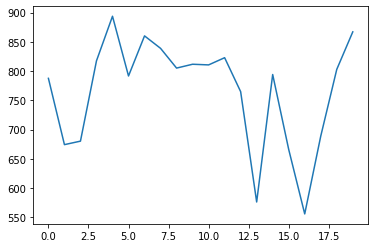

In [ ]:
plt.plot(the_list)

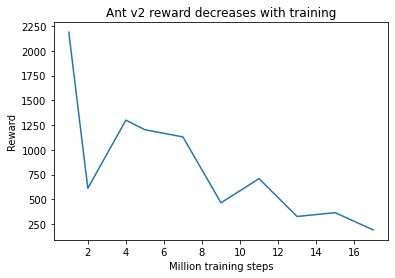

In [ ]:
import matplotlib.pyplot as plt
index = [1,2,4,5,7,9,11,13,15,17]
plt.plot(index, rewardlist)
plt.xlabel("Million training steps")
plt.ylabel("Reward")
plt.title("Ant v2 reward decreases with training")
plt.show()

In [15]:
model = PPO.load('/content/drive/MyDrive/Deep Reinforcement Learning Project/new_ANT_5mil.zip')

In [16]:
#Stolen quickstart code

"""This is a simple example demonstrating how to clone the behavior of an expert.
Refer to the jupyter notebooks for more detailed examples of how to use the algorithms.
"""

import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.ppo import MlpPolicy

from imitation.algorithms import bc
from imitation.data import rollout
from imitation.data.wrappers import RolloutInfoWrapper

def sample_expert_transitions(expert):
    print("Sampling expert transitions.")
    rollouts = rollout.rollout(
        expert,
        DummyVecEnv([lambda: RolloutInfoWrapper(env)]),
        rollout.make_sample_until(min_timesteps=None, min_episodes=50),
        #unwrap = False,
        #exclude_infos = False
    )
    print(str(len(rollout.flatten_trajectories(rollouts))) + " expert transitions were sampled.")
    return rollout.flatten_trajectories(rollouts)


transitions = sample_expert_transitions(model)

Sampling expert transitions.
37740 expert transitions were sampled.


In [17]:
transition_list = [transitions[:10000] transitions[:500], transitions[:100]]

In [ ]:
original_reward_list = []
before_training_list = []
after_training_list = []
transition_x = [10000, 500, 100]
for index, transitions in enumerate(transition_list):
  bc_trainer = bc.BC(
      observation_space=env.observation_space,
      action_space=env.action_space,
      demonstrations=transitions,
  )
  first_policy = bc_trainer.policy


 

  env = gym.make("Ant-v2")
  obs, done = env.reset(), False
  vidname = 'video' + str(transition_x[index])
  env = gym.wrappers.RecordVideo(env, vidname, episode_trigger = lambda x: x == 2)


  #print("Training a policy using Behavior Cloning")
  bc_trainer.train(n_epochs=50)
  reward1, _ = evaluate_policy(first_policy, env, n_eval_episodes=50, render=False)
  #before_training_list.append(reward1)
  reward2, _ = evaluate_policy(bc_trainer.policy, env, n_eval_episodes=50, render=False)
  #after_training_list.append(reward2)
  reward_original, _ = evaluate_policy(model, env, n_eval_episodes=50, render=False)
  #print(f"Original Reward: {reward_original}")
  #original_reward_list.append(reward_original)

In [51]:
original_reward_list_50 = original_reward_list
before_training_list_50 = before_training_list
after_training_list_50 = after_training_list

In [52]:
import numpy as np
np.save("original50", np.array(original_reward_list_50))
np.save("before50", np.array(before_training_list_50))
np.save("after50", np.array(after_training_list_50))

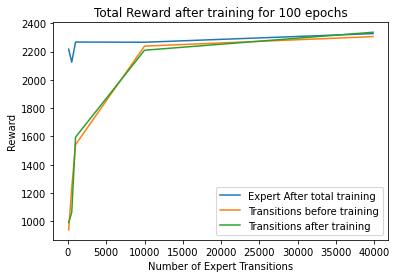

In [54]:
import matplotlib.pyplot as plt
transition_x = [39834, 10000, 1000, 500, 100]
line1 = plt.plot(transition_x, original_reward_list, label='Expert After total training')
line2 = plt.plot(transition_x, before_training_list, label='Transitions before training')
line3 = plt.plot(transition_x, after_training_list,  label='Transitions after training')

plt.ylabel("Reward")
plt.xlabel("Number of Expert Transitions")
plt.title("Total Reward after training for 100 epochs")
plt.legend()
plt.show()

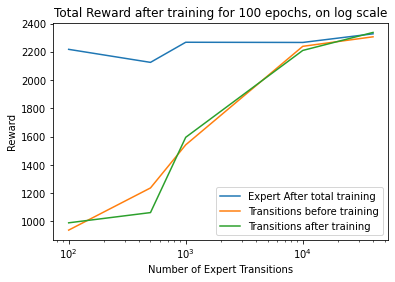

In [56]:
import matplotlib.pyplot as plt
transition_x = [39834, 10000, 1000, 500, 100]
line1 = plt.plot(transition_x, original_reward_list, label='Expert After total training')
line2 = plt.plot(transition_x, before_training_list, label='Transitions before training')
line3 = plt.plot(transition_x, after_training_list,  label='Transitions after training')

plt.ylabel("Reward")
plt.xlabel("Number of Expert Transitions")
plt.title("Total Reward after training for 100 epochs, on log scale")
plt.legend()
plt.xscale('log')
plt.show()

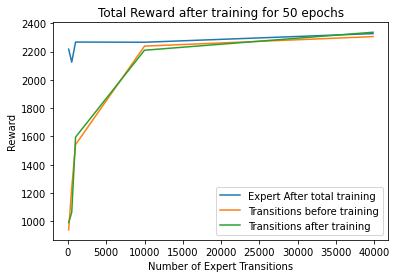

In [58]:
import matplotlib.pyplot as plt
transition_x = [39834, 10000, 1000, 500, 100]
line1 = plt.plot(transition_x, original_reward_list_50, label='Expert After total training')
line2 = plt.plot(transition_x, before_training_list_50, label='Transitions before training')
line3 = plt.plot(transition_x, after_training_list_50,  label='Transitions after training')

plt.ylabel("Reward")
plt.xlabel("Number of Expert Transitions")
plt.title("Total Reward after training for 50 epochs")
plt.legend()
plt.show()

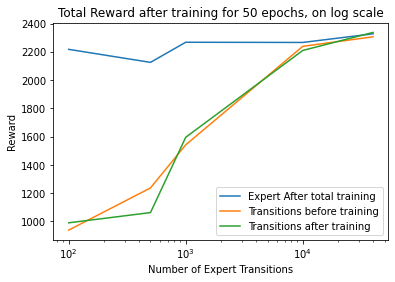

In [60]:
import matplotlib.pyplot as plt
transition_x = [39834, 10000, 1000, 500, 100]
line1 = plt.plot(transition_x, original_reward_list_50, label='Expert After total training')
line2 = plt.plot(transition_x, before_training_list_50, label='Transitions before training')
line3 = plt.plot(transition_x, after_training_list_50,  label='Transitions after training')

plt.ylabel("Reward")
plt.xlabel("Number of Expert Transitions")
plt.title("Total Reward after training for 50 epochs, on log scale")
plt.legend()
plt.xscale('log')

plt.show()

##Overparametrized Network

In [ ]:
policy_kwargs = dict ( activation_fn = th.nn.ReLU,
  net_arch =[128 , 128 , dict ( pi =[32] , vf =[32]) ])
model = PPO (" MlpPolicy ", env , policy_kwargs = policy_kwargs )

## Make GIF

In [8]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [ ]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make("Ant-v2")
obs, done = env.reset(), False
#Why do I still get the monitor error when they took the wrapper out of gym 0.23
env = gym.wrappers.RecordVideo(env, 'video', episode_trigger = lambda x: x == 2)

model = PPO.load('/content/drive/MyDrive/Deep Reinforcement Learning Project/new_ANT_5mil.zip')
evaluate_policy(model, env, n_eval_episodes=50, render=False)